# Mount dataset resources

In [ ]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset/'
%pwd

/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset


'/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset'

# Exploratory Data Analysis(EDA): An extensive guide

[Текст ссылки](https://inblog.in/Exploratory-Data-Analysis-EDA-An-extensive-guide-sgBSDstZR4)

Данная тетрадь включает следующие действия:
* Exploratory Data Analysis
* Missing Data and Outlier handling
* Feature Engineering and Feature Selection
* Model Building and Hyperparameter tuning techniques

We will be using the Xgboost algorithm to create our models.

## Why EDA?

Все мы знаем, что расширенный EDA является неотъемлемой частью жизненного цикла Data Science, но зачем нам это делать? Простой ответ на этот вопрос - лучше узнать наши данные и получить интуитивное понимание наших данных. Выполняя EDA, мы можем исследовать, в каких случаях наша модель дает верный прогноз, а в каких - нет, если вы рассматриваете проблему классификации. Кроме того, выводы, полученные из наших данных, могут быть использованы для согласования с тем, что говорят эксперты в предметной области, независимо от того, соответствуют ли данные их многолетнему опыту или нет.


## Our problem

В нашем случае мы будем использовать набор данных о доходах взрослого населения, который можно использовать для прогнозирования того, имеет ли человек доход выше 50 тысяч долларов США или нет, на основе ряда переменных. Таким образом, мы имеем дело с проблемой машинного обучения классификации с учителем.

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

In [ ]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
# Importing the required datasets:
# https://www.kaggle.com/wenruliu/adult-income-dataset

adi_data = pd.read_csv('adult.csv')

# Descriptive analysis

### 1.1. Common view of the dataset (head & tail)

In [ ]:
# In order to get a feel for our data, we will take a look at the head and tail columns

# Checking the head and tail columns for the train data:
adi_data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# tail columns

adi_data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### 1.2. Shape & info

In [ ]:
# Now we will check the shape of the datasets:
print(f'The shape of the data: {adi_data.shape}')

# Taking a look at the variable types:
print(f'\n----------\nDataset info:')
adi_data.info(memory_usage='deep')

The shape of the data: (48842, 15)

----------
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 29.8 MB


In [ ]:
m = adi_data['income'].value_counts()
m

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
print(f"% peaple with income <=50K: {m['<=50K']/adi_data.shape[0]:5.1%}")
print(f"% peaple with income  >50K: {m['>50K']/adi_data.shape[0]:5.1%}")

% peaple with income <=50K: 76.1%
% peaple with income  >50K: 23.9%


**Target feature:**<br>
Peaple with income:
* менее или равно 50K: 37155 (76.2%)
* более 50K:           11687 (23.9%)

**Observations:**
* Мы можем заметить, что у нас есть 2 типа переменных: `int64`,`object`
* Соотношение классов `income` в датасете **не сбаласировано**
* memory usage: 29.9MB


Разделим колонки по типам:

In [ ]:
# получить список типов
list_types=[]
for idx, item in enumerate(np.unique(adi_data.dtypes.values)):
  print(f'{idx} - {item.name}')
  list_types.append(item.name)
list_types

0 - int64
1 - object


['int64', 'object']

In [ ]:
numeric_cols=adi_data.select_dtypes(include='int64').columns
object_cols=adi_data.select_dtypes(include='object').columns

print(f'Numeric: {numeric_cols}')
print(f'Numeric: {object_cols}')

Numeric: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Numeric: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


### Statistics for object-cols

In [ ]:
# Using the describe we will try and gain more insights of our data:
adi_data[object_cols].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [ ]:
adi_data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
for idx,item in enumerate(object_cols):
  print(f'-------------------------------------- {idx}: "{item}"')
  print(f'Unique vals:\n{adi_data[item].unique()}\n')

-------------------------------------- 0: "workclass"
Unique vals:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

-------------------------------------- 1: "education"
Unique vals:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

-------------------------------------- 2: "marital-status"
Unique vals:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

-------------------------------------- 3: "occupation"
Unique vals:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

-------------------------------------- 4: "relationship"
Unique vals:
['Own

In [ ]:
adi_data['native-country'][adi_data['native-country']=='?'].count()
adi_data.workclass[adi_data.workclass=='?'].count()

2799

In [ ]:
total_line=adi_data.shape[0]
n_workclass=adi_data.workclass[adi_data.workclass=='?'].count()
n_occupation=adi_data.occupation[adi_data.occupation=='?'].count()
n_native_country=adi_data['native-country'][adi_data['native-country']=='?'].count()

print(f'{"Num cols where workclass=?":35}: {n_workclass:7} ({n_workclass/total_line:6.1%})')
print(f'{"Num cols where occupation=?:":35}: {n_occupation:7} ({n_occupation/total_line:6.1%})')
print(f'{"Num cols where native-country=?:":35}: {n_native_country:7} ({n_native_country/total_line:6.1%})')

Num cols where workclass=?         :    2799 (  5.7%)
Num cols where occupation=?:       :    2809 (  5.8%)
Num cols where native-country=?:   :     857 (  1.8%)


**Insight:**
* There are classes having undefined value '?'

|`workclass`|`occupation`|`native-country`|
|--|--|--|
| 2799 ( 5.7%)|2809 ( 5.8%)|857 ( 1.8%)|

> <font color='red'>**This fact requires special treatment**</font>






### Statistics for numeric-cols

In [ ]:
# Using the describe we will try and gain more insights of our data:
adi_data[numeric_cols].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
5%,19.000000,3.961540e+04,5.000000,0.000000,0.000000,17.050000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
95%,63.000000,3.794816e+05,14.000000,5013.000000,0.000000,60.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Observations:**
* В данных есть как числовые таК и категориальные переменные.

Прежде чем проводить дальнейший анализ, мы разделим данные на числовые и категориальные, чтобы упростить наш анализ.


## Numerical & Categorical features

* numeric_data - числовые фичи
* categorical_data - категорийные фичи


In [ ]:
# CATEGORICAL FEATURES:

categorical_data = adi_data[object_cols]  #.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = object_cols  #categorical_data.columns

print('Categorical Features: ')
print(categorical_data.head(5))
print('----'*20)

Categorical Features: 
   workclass     education      marital-status  ...  gender native-country income
0    Private          11th       Never-married  ...    Male  United-States  <=50K
1    Private       HS-grad  Married-civ-spouse  ...    Male  United-States  <=50K
2  Local-gov    Assoc-acdm  Married-civ-spouse  ...    Male  United-States   >50K
3    Private  Some-college  Married-civ-spouse  ...    Male  United-States   >50K
4          ?  Some-college       Never-married  ...  Female  United-States  <=50K

[5 rows x 9 columns]
--------------------------------------------------------------------------------


In [ ]:
# NUMERIC FEATURES:

numeric_data = adi_data[numeric_cols]
#numeric_data = adi_data.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_cols  #numeric_data.columns 

print('Numeric Features: ')
print(numeric_data.head(5))
print('----'*20)

Numeric Features: 
   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
4   18  103497               10             0             0              30
--------------------------------------------------------------------------------


# Clearning data

## CHECKING MISSING DATA:

In [ ]:
#max length of column title
mlen=len(max(adi_data.columns.values, key=len))

na_values = (adi_data.isnull().sum()/adi_data.isnull().count())
for cols in na_values.index.values:
  print(f'{cols:<{mlen+2}}{na_values[cols]} ({na_values[cols]:6.2%})')

age              0.0 ( 0.00%)
workclass        0.0 ( 0.00%)
fnlwgt           0.0 ( 0.00%)
education        0.0 ( 0.00%)
educational-num  0.0 ( 0.00%)
marital-status   0.0 ( 0.00%)
occupation       0.0 ( 0.00%)
relationship     0.0 ( 0.00%)
race             0.0 ( 0.00%)
gender           0.0 ( 0.00%)
capital-gain     0.0 ( 0.00%)
capital-loss     0.0 ( 0.00%)
hours-per-week   0.0 ( 0.00%)
native-country   0.0 ( 0.00%)
income           0.0 ( 0.00%)


In [ ]:
null_values = adi_data.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(adi_data)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


> We are getting 0 nan values<br> but that is not possible as we have seen ? in our dataset.<br>
>> We will replace ? with np.nan to get our na values.

In [ ]:
# We have observed that we have special characters in the dataset.
# Checking how many rows and variables have special characters.

adi_data.isin(['?']).sum(axis=0)

# We can observe that workclass, occupation and native-country have special characters.

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
# replacing the ? value with np.nan value for the 3 columns:
# adi_data.replace('?', np.nan, inplace=True)

# train data:
adi_data['workclass'] = adi_data['workclass'].replace('?', np.nan)
adi_data['occupation'] = adi_data['occupation'].replace('?', np.nan)
adi_data['native-country'] = adi_data['native-country'].replace('?', np.nan)


показать Nan на графике

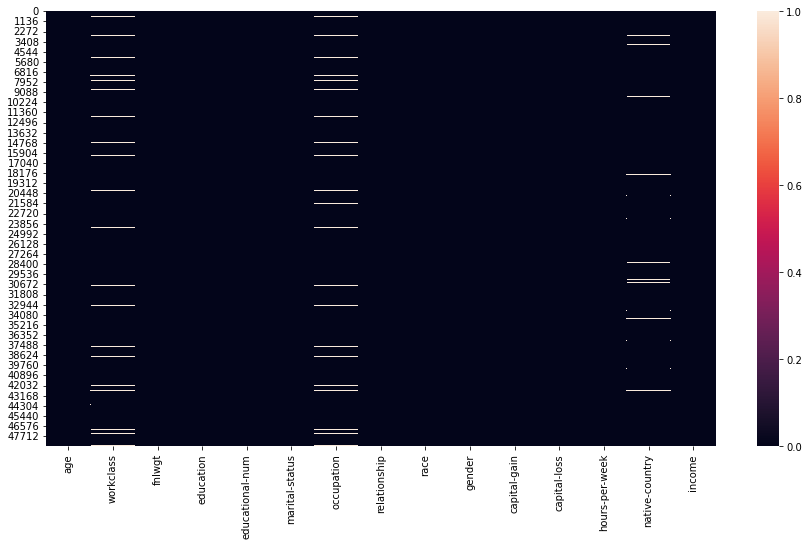

In [ ]:
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(adi_data.isnull());

There are 2 approach to handle Nan values:
* remove raws having Nan
* replace Nan with appropriate values

In [ ]:
# we can assign mode() value for Nan fields

#adi_data['occupation'].fillna(adi_data['occupation'].mode()[0],inplace = True)
#adi_data['workclass'].fillna(adi_data['workclass'].mode()[0],inplace = True)
#adi_data['native-country'].fillna(adi_data['native-country'].mode()[0],inplace = True)

Drop ALL Nan cells (earlier == '?')

In [ ]:
# The rows with NaN values is not much, we will drop the data with NaN values.

print(f'Parameters BEFORE NaN remove')
print(f'shape:{adi_data.shape}')
print(f'info:\n{adi_data.info(memory_usage="deep",verbose=False)}\n------------------')

#dropping the NaN rows now 
adi_data.dropna(how='any',inplace=True)

# Checking the shape of the data:
print(f'Parameters AFTER NaN remove')
print(f'shape:{adi_data.shape}')
print(f'info:\n{adi_data.info(memory_usage="deep")}')

Parameters BEFORE NaN remove
shape:(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 15 entries, age to income
dtypes: int64(6), object(9)
memory usage: 29.7 MB
info:
None
------------------
Parameters AFTER NaN remove
shape:(45222, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     

In [ ]:
# assigning adi_data to adi_data_v1

adi_data_v1 = adi_data.copy()

### Check for Duplicate Data

In [ ]:
adi_data_v1.shape

(45222, 15)

In [ ]:
adi_data_v1.duplicated()

0        False
1        False
2        False
3        False
5        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 45222, dtype: bool

In [ ]:
print(f'shape dups:{adi_data_v1[adi_data_v1.duplicated()].shape}')
adi_data_v1.duplicated().sum()
adi_data_v1[adi_data_v1.duplicated()]

shape dups:(47, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [ ]:
if adi_data_v1.duplicated().any()==True:
  print("There are dups")
  print(f'Shape BEFORE: {adi_data_v1.shape}')
  adi_data_v1.drop_duplicates(inplace=True)
  print(f'Shape AFTER : {adi_data_v1.shape}')
else:
  print("There are NO dups")


There are dups
Shape BEFORE: (45222, 15)
Shape AFTER : (45175, 15)


In [ ]:
adi_data_v1.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## CHECKING OUTLIERS:

В этой части мы проверим, присутствуют ли какие-либо выбросы в числовых столбцах.

Мы будем рассматривать точки за пределами `third quartile + 1.5*IQR` и точки ниже `first quartile - 1.5*IQR` как **выбросы**.


In [ ]:
cols = list(numeric_data) # A List of all features
total_lines = numeric_data.shape[0]

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentages']) # Creating a new dataframe to

for column in numeric_col: # Iterating thorough each feature            
            # first quartile (Q1)
        q1 = numeric_data[column].quantile(0.25) 
            
            # third quartile (Q3)
        q3 = numeric_data[column].quantile(0.75)
            
            # IQR
        iqr = q3 - q1
            # 
        fence_low = q1 - (1.5*iqr)
        
        fence_high = q3 + (1.5*iqr)
            # finding the number of outliers using 'and(|) condition. 
        total_outlier = numeric_data[(numeric_data[column] < fence_low) | 
                                     (numeric_data[column] > fence_high)].shape[0]
        
        outliers = outliers.append({'Feature':column,
                                    'Number of Outliers':total_outlier,
                                    'Percentages':total_outlier/total_lines},ignore_index=True)
outliers

,Feature,Number of Outliers,Percentages
0,age,216,0.004422
1,fnlwgt,1453,0.029749
2,educational-num,1794,0.036731
3,capital-gain,4035,0.082613
4,capital-loss,2282,0.046722
5,hours-per-week,13496,0.276320


**Observations from NA values and Outlier inspection.**

* Для некоторых из наших признаков есть значения na, но, поскольку значения малы по сравнению с размером набора данных, мы удалили значения na.
* Выбросы присутствуют почти во всех числовых переменных наших данных.
* Мы продолжим изучать наши данные, а затем решим, как обрабатывать эти выбросы.


## UNIVARIATE ANALYSIS:

В этом разделе мы проведем одномерный (univariate) анализ наших числовых, а также категориальных переменных.

**NUMERIC DATA:**<br>
Мы построим гистограммы для числовых данных и проверим распределения для каждой переменной.


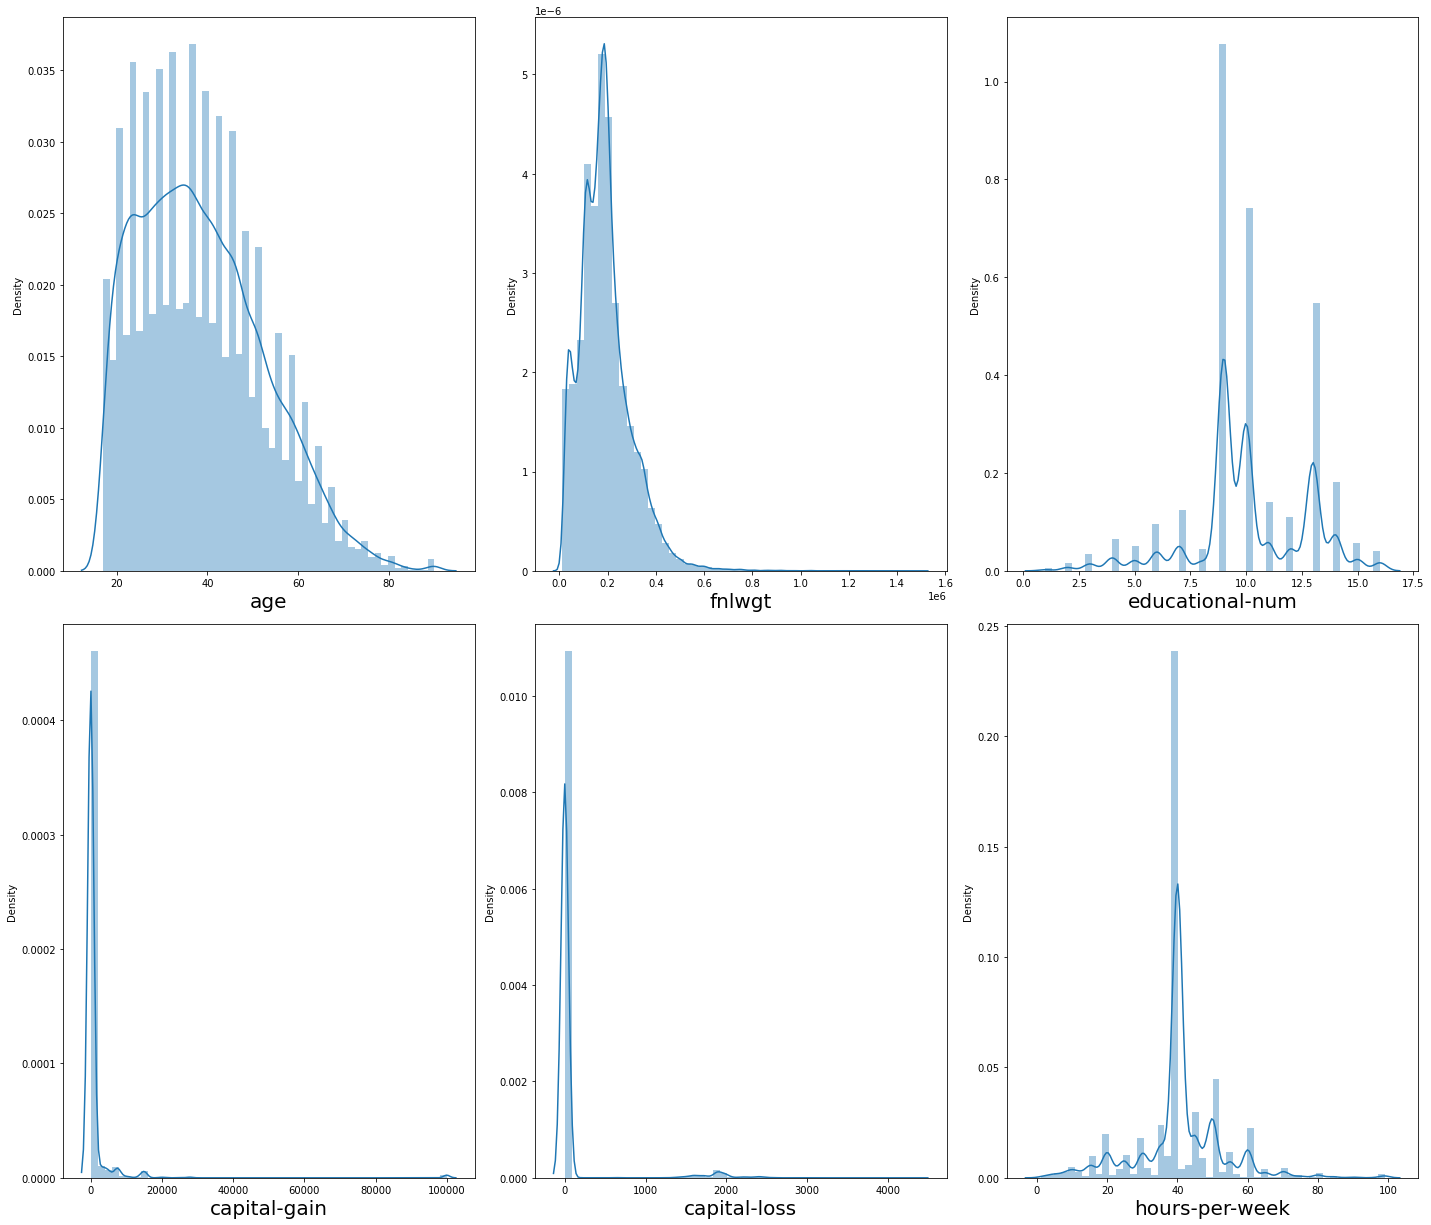

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(numeric_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Observations:**

* Просто наблюдая за числовыми переменными `age`, `fnlwgt`, `hrs-perweek` and `educational-num`, мы можем сказать, что в данных есть довольно большие вариации.
* Рассматривая переменные `capital-gain` and `capital-loss`, мы видим, что они имеют меньшую дисперсию, так как большинство значений равны 0. Мы могли бы также пропустить эти переменные.
* `age` переменная не сильно искажена, но остальные переменные либо искажены, либо распределены неравномерно.
* Глядя на распределения, мы можем решить, что делать с нашими выбросами.


In [ ]:
def showStats(inDF, inFeature):
  stats_=inDF[inFeature].describe().apply("{0:.5f}".format)

  print(f"Descriptive stats:\nType: {inDF[inFeature].dtype.name}\n{stats_}\n----------------\n")
  inDF[inFeature].hist(figsize=(10,5),xrot=90)


In [ ]:
def printHistStat(inDF, inFeature):
  total_=inDF.shape[0]
  s_=max(inDF[inFeature].unique(), key=len)
  ln_=len(s_)
  for item in inDF[inFeature].unique():
    x_=inDF[inDF[inFeature]==item].shape[0]
    print(f'{item:{ln_+2}}{x_:7} ({x_/total_:5.1%})')

In [ ]:
s=max(adi_data_v1['education'].unique(), key=len)
ln=len(s)
print(f'{s:{ln}}|')

Some-college|


### **`age`** analysis

Descriptive stats:
Type: int64
count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
----------------



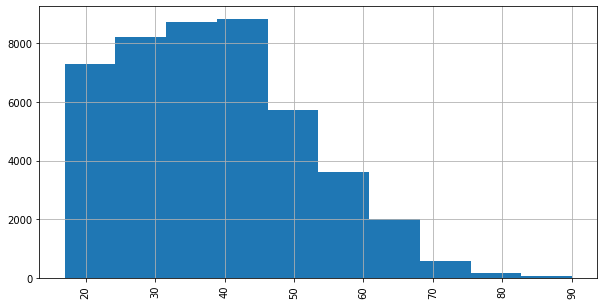

In [ ]:
showStats(adi_data_v1,'age')

In [ ]:
stats_age=adi_data_v1['age'].describe()
num_age= sum(adi_data_v1['age'].between(stats_age['min'],stats_age['75%']))
total=adi_data_v1.shape[0]
print(f"Num people in [{stats_age['min']:.0f}-{stats_age['75%']:.0f}] years: {num_age} ({num_age/total:6.2%})")

Num people in [17-47] years: 34043 (75.36%)


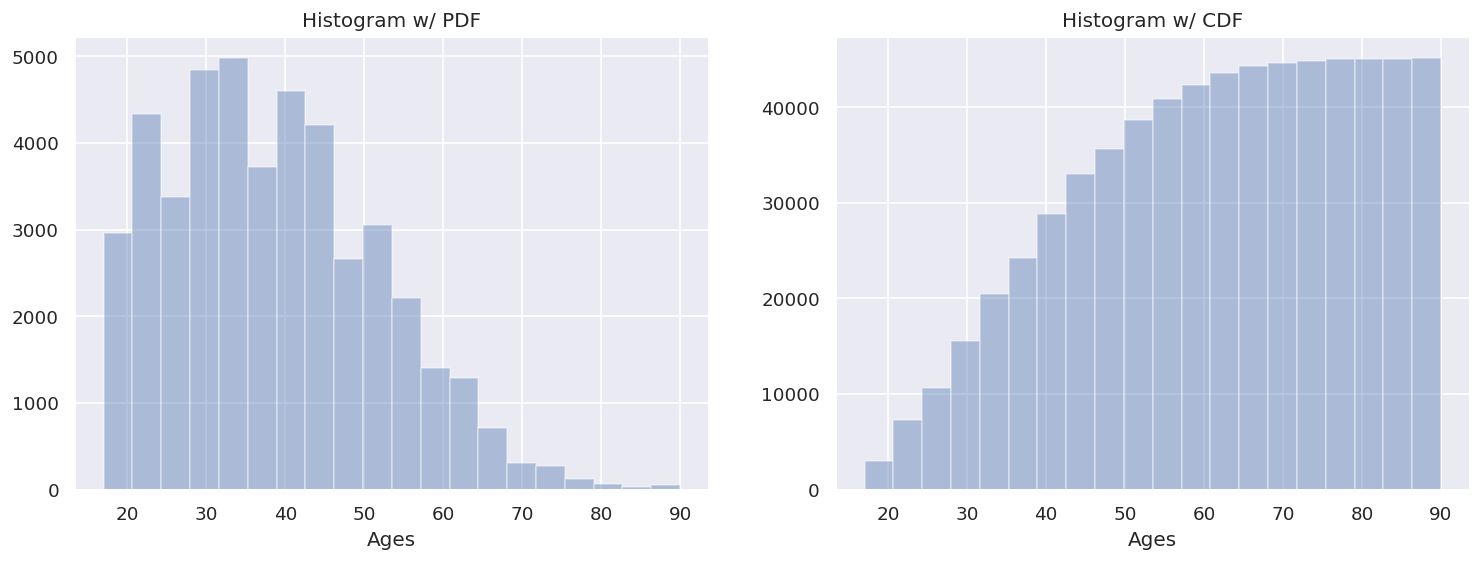

In [ ]:
sns.set()

fig, eks = plt.subplots(1,2, figsize=(15,5),dpi=120)
eks[0].set_title("Histogram w/ PDF")
eks[1].set_title("Histogram w/ CDF")
args_cum = {"cumulative":True}
sns.distplot(adi_data_v1["age"], bins=20, kde=False, axlabel='Ages', ax=eks[0]) 
sns.distplot(adi_data_v1["age"], bins=20, kde=False, axlabel='Ages',hist_kws=args_cum, ax=eks[1])

Insight:
* `age` аттрибут несимметричен (not symetric) - имеет смещение вправо (right-skewed).
* минимальный и максимальный возраст от 17 до 90.
* Num people in [17-47] years: 34043 (75.36%)

ps: ( 17=stats.min) and 47 (quantile=75%)


### `fnlwgt` распределение

Descriptive stats:
Type: int64
count    4.517500e+04
mean     1.897388e+05
std      1.056524e+05
min      1.349200e+04
25%      1.173925e+05
50%      1.783120e+05
75%      2.379030e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
----------------



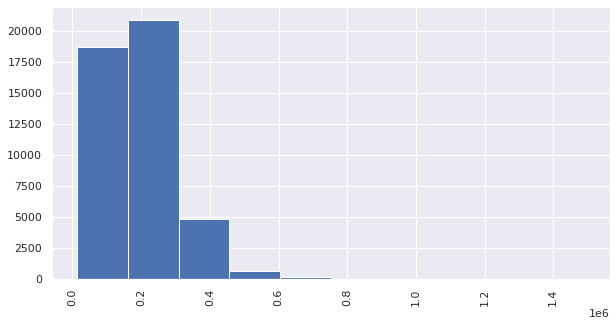

In [ ]:
showStats(adi_data_v1,'fnlwgt')

Insight:
* `fnlwgt` аттрибут несимметричен (not symetric) - имеет смещение вправо (right-skewed).

### `capital-gain` распределение

Descriptive stats:
Type: int64
count    45175.000000
mean      1102.576270
std       7510.249876
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
----------------



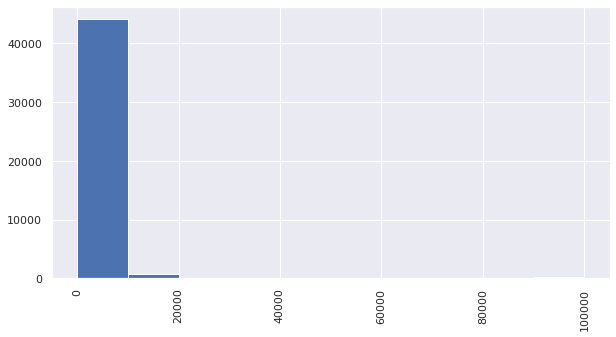

In [ ]:
showStats(adi_data_v1,'capital-gain')

Insight:
* `capital-gain` shows that either a person has no gain or has gain of very large amount(10k or 99k).

### `capital-loss` распределение

Descriptive stats:
Type: int64
count    45175.000000
mean        88.687593
std        405.156611
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64
----------------



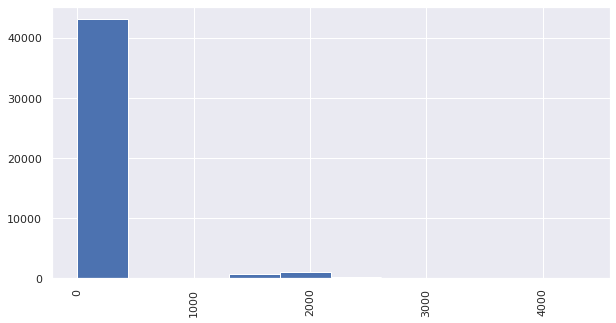

In [ ]:
showStats(adi_data_v1,'capital-loss')

**Insight:**
* Эта гистограмма показывает, что большинство значений `capital-loss` сосредоточено в 0, и лишь некоторые из них не равны нулю (2282). Этот атрибут аналогичен приросту капитала (capital-gain), то есть большинство значений сосредоточено на 0 (почти 43000 из них).

### Relation btw in `capital-gain` and `capital-loss`

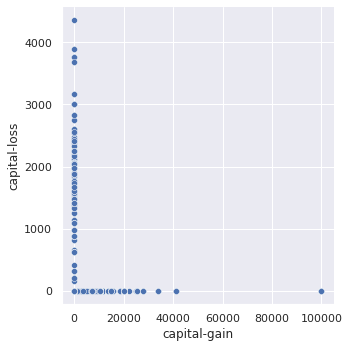

In [ ]:
sns.relplot('capital-gain','capital-loss',data= adi_data_v1)
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

**Insight:**

1. both `capital-gain` and `capital-loss` can be zero(0)
2. if `capital-gain` is Zero then `capital-loss` being high or above zero.
3. if `capital-loss` is Zero then capital-gain being high or above zero.

### `hours-per-week` распределение

Descriptive stats:
Type: int64
count    45175.000000
mean        40.942512
std         12.007730
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
----------------



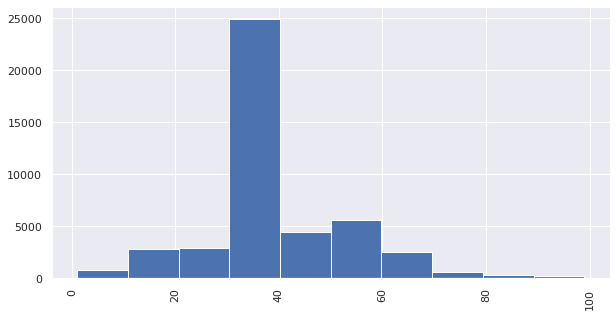

In [ ]:
showStats(adi_data_v1,'hours-per-week')

**Insight:**
* атрибут `hours-per-week` варьируется в диапазоне от 1 до 99.
* около 27000 человек работает по 30-40 часов в неделю
* Также есть несколько человек, которые работают по 80-100 часов в неделю, а некоторые меньше 20 (необычно!)


### `workclass` analysis

In [ ]:
def snsPlotStat(inDF, inFeature):
  plt.figure(figsize=(12,5))
  total = float(inDF.shape[0]) #income
  a = sns.countplot(x=inFeature,data=inDF,)
  for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
  plt.show()

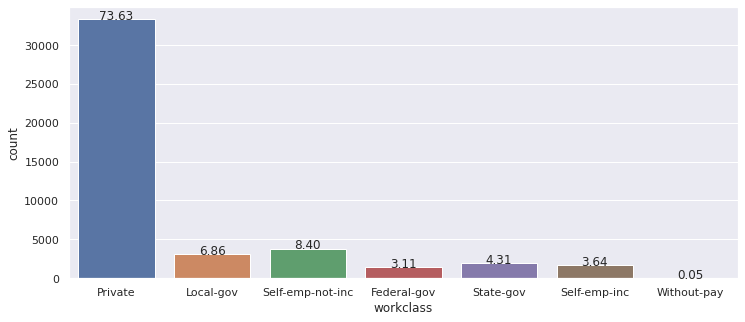

In [ ]:
snsPlotStat(adi_data_v1,'workclass')

**Insight:**
* большинство из них принадлежит к `private `классу, что составляет около 74%.
* классы `without-play` и `never-play` имеют минимальное количество


Descriptive stats:
Type: object
count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object
----------------



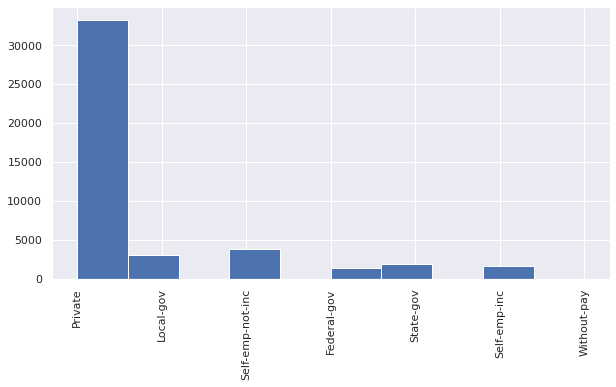

In [ ]:
showStats(adi_data_v1,'workclass')

### `education` распределение

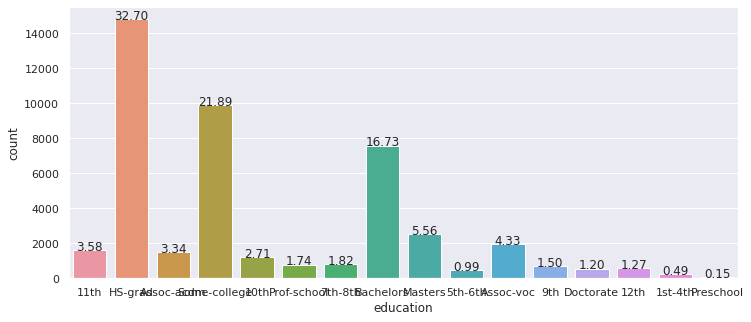

In [ ]:
snsPlotStat(adi_data_v1,'education')

Descriptive stats:
Type: object
count       45175
unique         16
top       HS-grad
freq        14770
Name: education, dtype: object
----------------



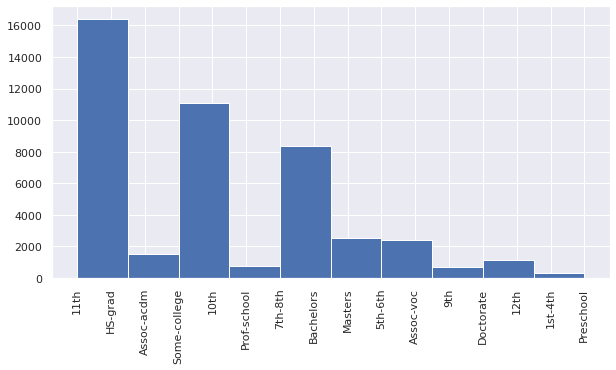

In [ ]:
showStats(adi_data_v1,'education')

**Insight:**
* На долю `Hs-grad` приходится 32,32% всего атрибута `education`.
* `pre-school` имеет мин. значение


In [ ]:
filter1=adi_data_v1['education']=='Bachelors'
filter2=adi_data_v1['education']=='Masters'
num_edu=len(adi_data_v1[filter1 | filter2])
total=adi_data_v1.shape[0]
print(f'Num of peaple having Bachelors|Masters: {num_edu} ({num_edu/total:.1%})')

Num of peaple having Bachelors|Masters: 10072 (22.3%)


In [ ]:
printHistStat(adi_data_v1,'education')

11th             1619 ( 3.6%)
HS-grad         14770 (32.7%)
Assoc-acdm       1507 ( 3.3%)
Some-college     9887 (21.9%)
10th             1223 ( 2.7%)
Prof-school       785 ( 1.7%)
7th-8th           822 ( 1.8%)
Bachelors        7559 (16.7%)
Masters          2513 ( 5.6%)
5th-6th           447 ( 1.0%)
Assoc-voc        1958 ( 4.3%)
9th               676 ( 1.5%)
Doctorate         544 ( 1.2%)
12th              575 ( 1.3%)
1st-4th           220 ( 0.5%)
Preschool          70 ( 0.2%)


Descriptive stats:
Type: int64
count    45175.000000
mean        10.119314
std          2.551740
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educational-num, dtype: float64
----------------



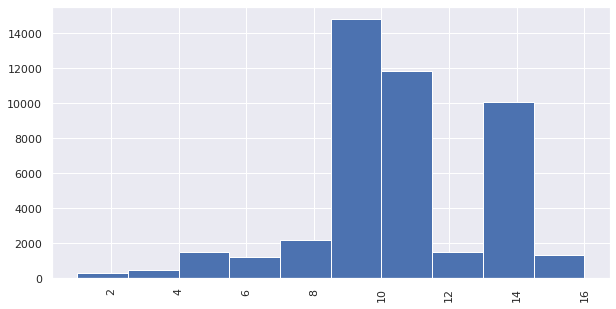

In [ ]:
showStats(adi_data_v1,'educational-num')

### `marital-status` распределение

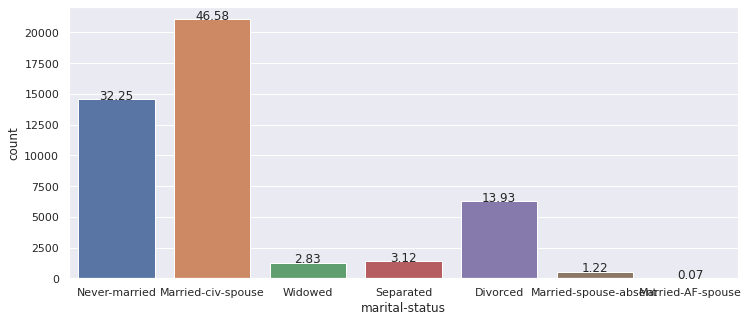

In [ ]:
snsPlotStat(adi_data_v1,'marital-status')

**Insight:**
* Максимальное количество образцов приходится на `Married-civ-spouse`.
* `Married-AF-spouse` имеет минимальное количество обследований.


### `occupation` распределение

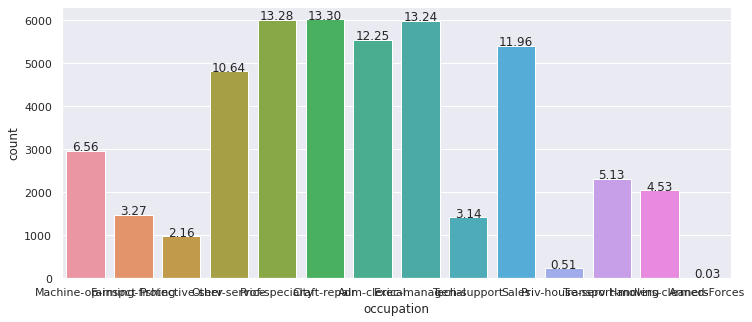

In [ ]:
snsPlotStat(adi_data_v1,'occupation')

**Insight:**
* Максимальное количество приходится на Prof-specialty (проф-специальностей). 
* В `Armed-Forces` (Вооруженных силах) минимальное количество образцов в атрибуте `occupation`.


### `relationship` распределение

In [ ]:
printHistStat(adi_data_v1,'relationship')

Own-child          6616 (14.6%)
Husband           18653 (41.3%)
Not-in-family     11679 (25.9%)
Unmarried          4787 (10.6%)
Wife               2091 ( 4.6%)
Other-relative     1349 ( 3.0%)


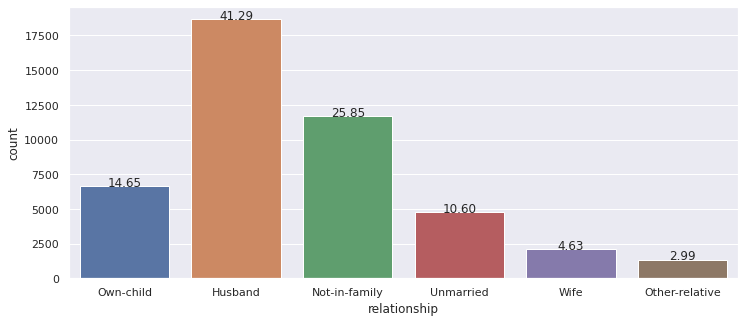

In [ ]:
snsPlotStat(adi_data_v1,'relationship')

**Insight:**
* Husband has maximum percentage among all.

### `race` распределение

In [ ]:
printHistStat(adi_data_v1,'race')

Black                  4227 ( 9.4%)
White                 38859 (86.0%)
Other                   353 ( 0.8%)
Amer-Indian-Eskimo      435 ( 1.0%)
Asian-Pac-Islander     1301 ( 2.9%)


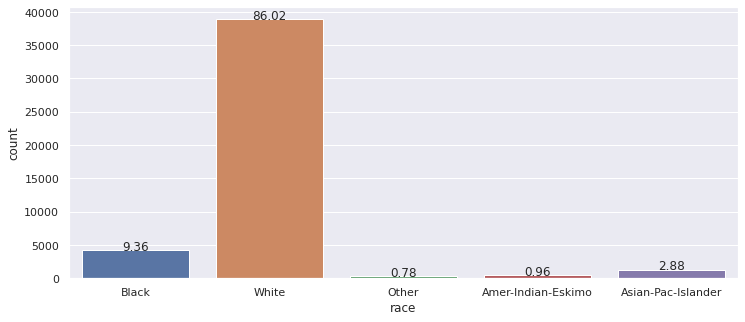

In [ ]:
snsPlotStat(adi_data_v1,'race')

**Insight:**
* `white` is maximun among all about 86.0%. black is second maximun.

### `gender` распределение

In [ ]:
printHistStat(adi_data_v1,'gender')

Male      30495 (67.5%)
Female    14680 (32.5%)


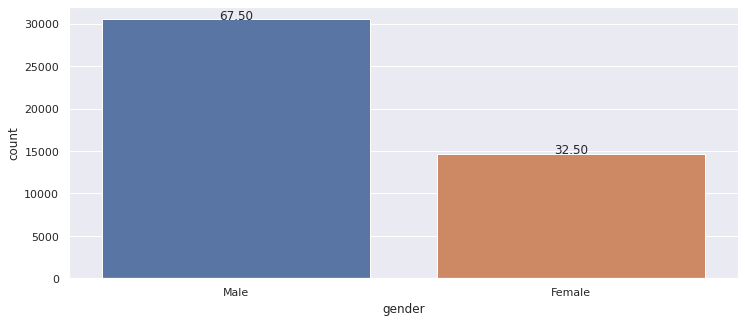

In [ ]:
snsPlotStat(adi_data_v1,'gender')

**Insight:**
* there are 2 unique categories in gender. frequency of male is higher than female.

### `income` distrubution

In [ ]:
printHistStat(adi_data_v1,'income')

<=50K    33973 (75.2%)
>50K     11202 (24.8%)


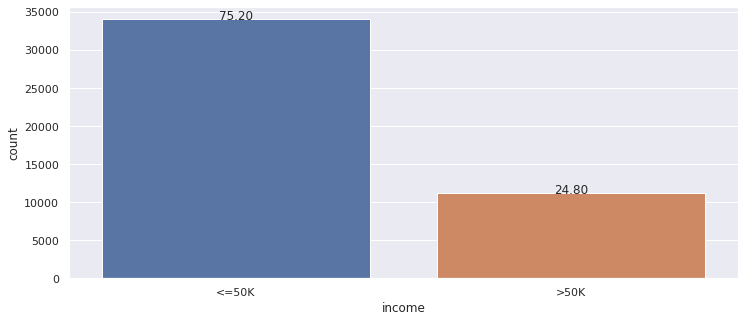

In [ ]:
snsPlotStat(adi_data_v1,'income')

**Insight:**
* In income there is 2 group,
* group1(who earns more than 50k) 23.93% 
* group2(who earns less than 50k) 76% belong to income

## CATEGORICAL DATA:
We will plot the barplots for the each of the categorical variables.

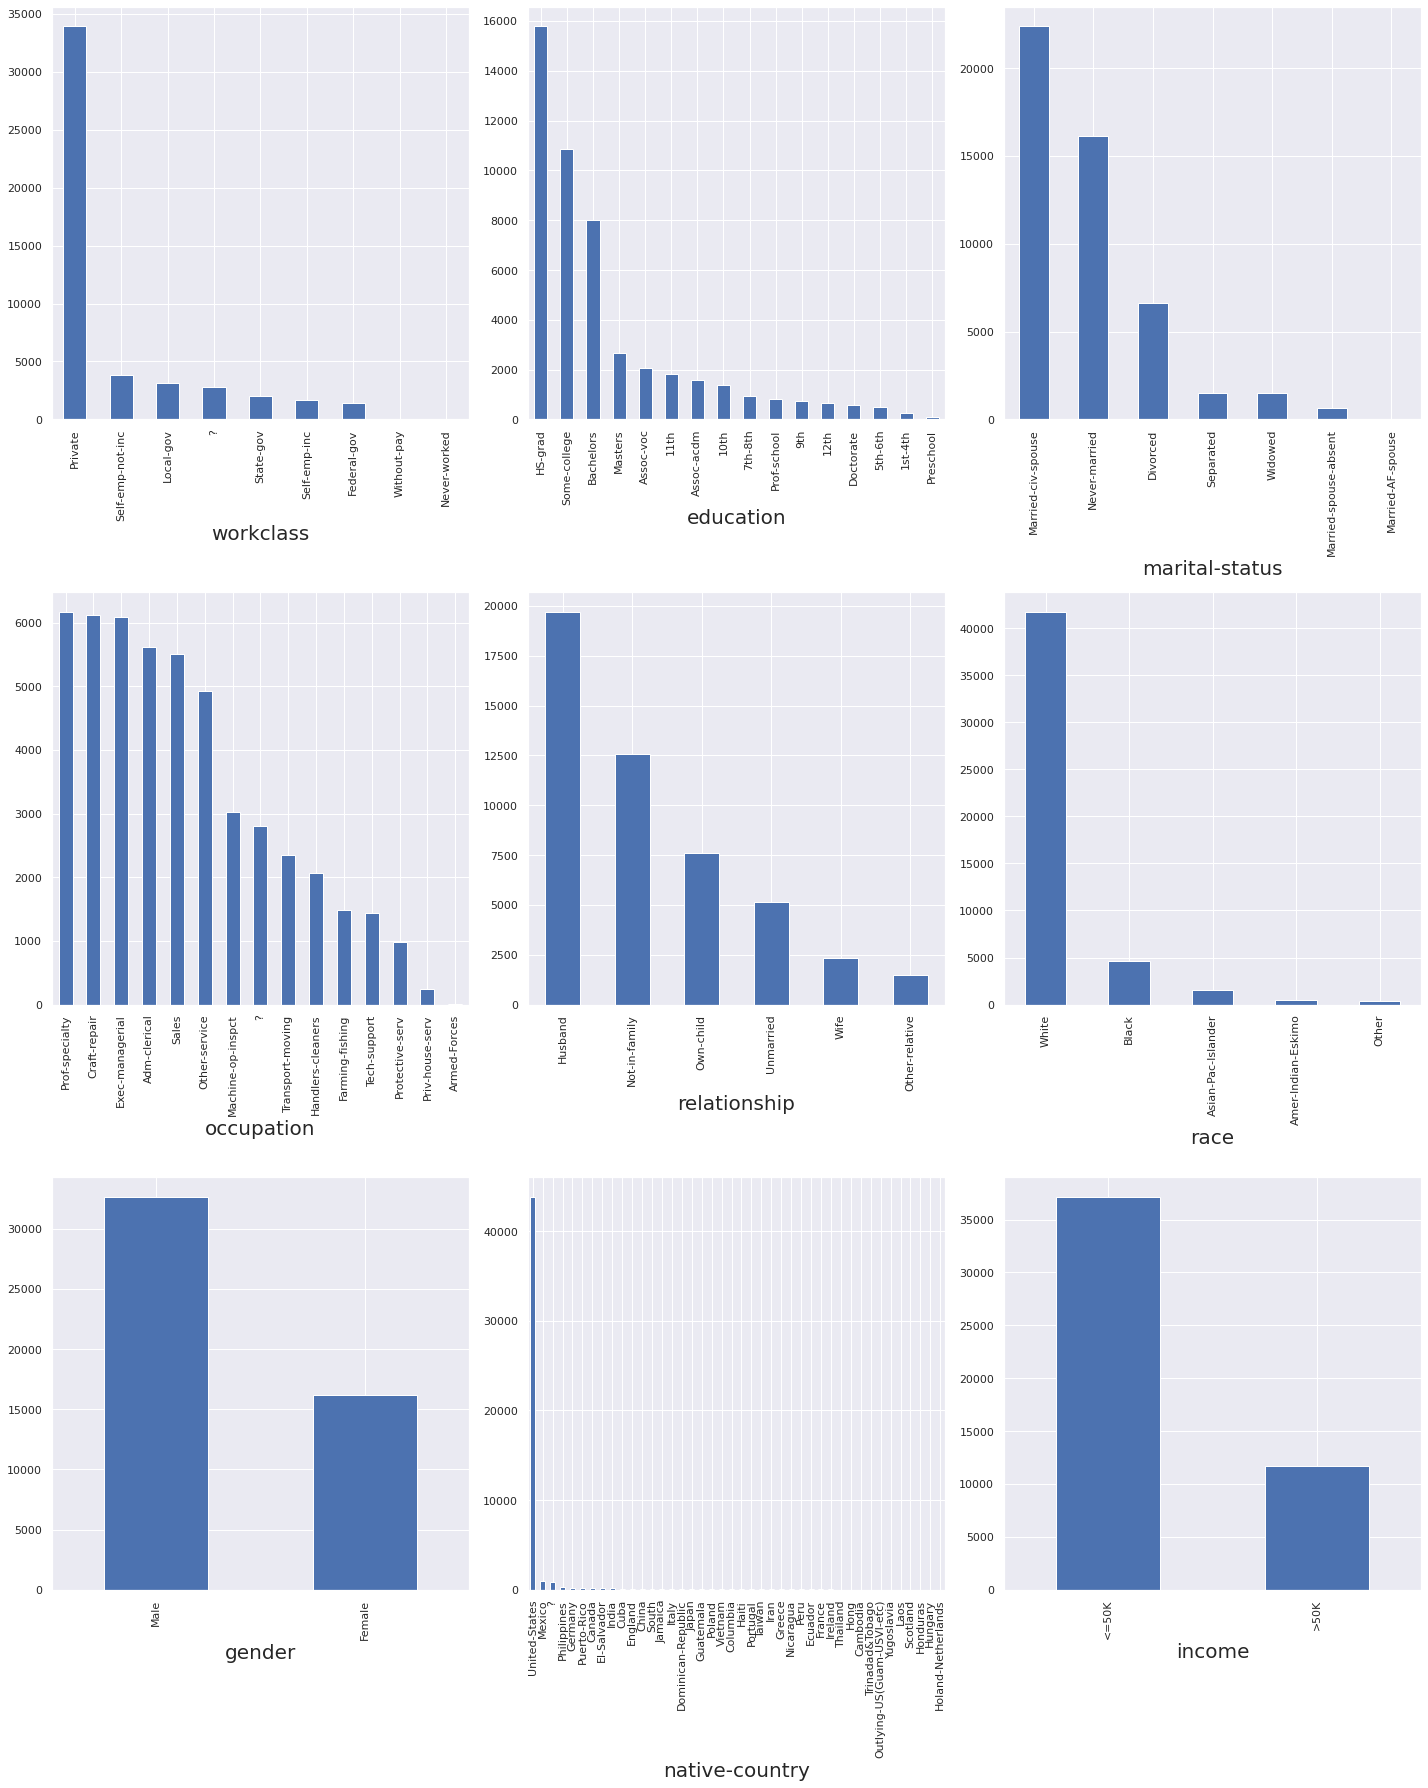

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        categorical_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
printHistStat(adi_data_v1,'workclass')

Private             33262 (73.6%)
Local-gov            3100 ( 6.9%)
Self-emp-not-inc     3795 ( 8.4%)
Federal-gov          1406 ( 3.1%)
State-gov            1946 ( 4.3%)
Self-emp-inc         1645 ( 3.6%)
Without-pay            21 ( 0.0%)


Descriptive stats:
Type: object
count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object
----------------



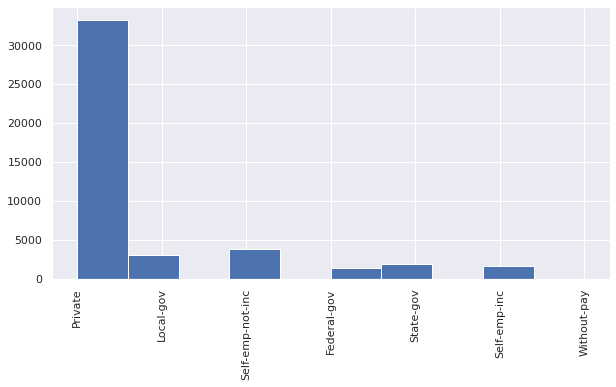

In [ ]:
showStats(adi_data_v1,'workclass')

Add special flag `income_flag`:
* LE 50K income: =0
* GT 50K: =1

In [ ]:
adi_data_v1['income_flag']=adi_data_v1['income'].map({'<=50K':0,'>50K':1})
adi_data_v1.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_flag
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


Descriptive stats:
Type: int64
count    45175.000000
mean         0.247969
std          0.431839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income_flag, dtype: float64
----------------



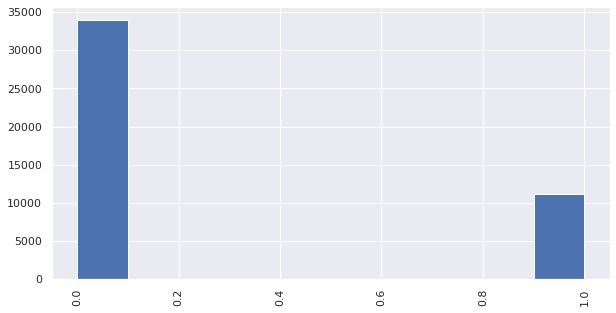

In [ ]:
showStats(adi_data_v1,'income_flag')

### Workclass getting the highest salary

In [ ]:
adi_data_v1.groupby('workclass')['income_flag'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income_flag, dtype: float64

In [ ]:
adi_data_v1.groupby('gender')['income_flag'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income_flag, dtype: float64

**Observations:**

* Если мы посмотрим на переменную workclass, то увидим, что 74% людей работают в частном секторе, 26% принадлежат к другим 7 категориям.
* Что касается education, то большинство людей закончили среднюю школу, учились в колледже или, по крайней мере, получили степень магистра.
* Учитывая семейное положение, 50% состоят в браке и 35% никогда не состояли в браке.
* Переменная occupation (рода занятий) равномерно распределяется между разными профессиями.
* Если мы рассмотрим переменную race, 92% - белые, а 8% - принадлежат к 4 другим расам.
* 72% людей в данных - мужчины.
* 96% населения относятся к США, 4% - к остальным странам.
* 25% людей имеют доход выше 50 тысяч и 75% ниже 50 тысяч, это указывает на несбалансированность наших данных


## BI-VARIATE ANALYSIS:

В первом случае двумерного (bivariate) анализа мы построим числовую переменную от переменной income (дохода), чтобы получить больше информации из наших данных.


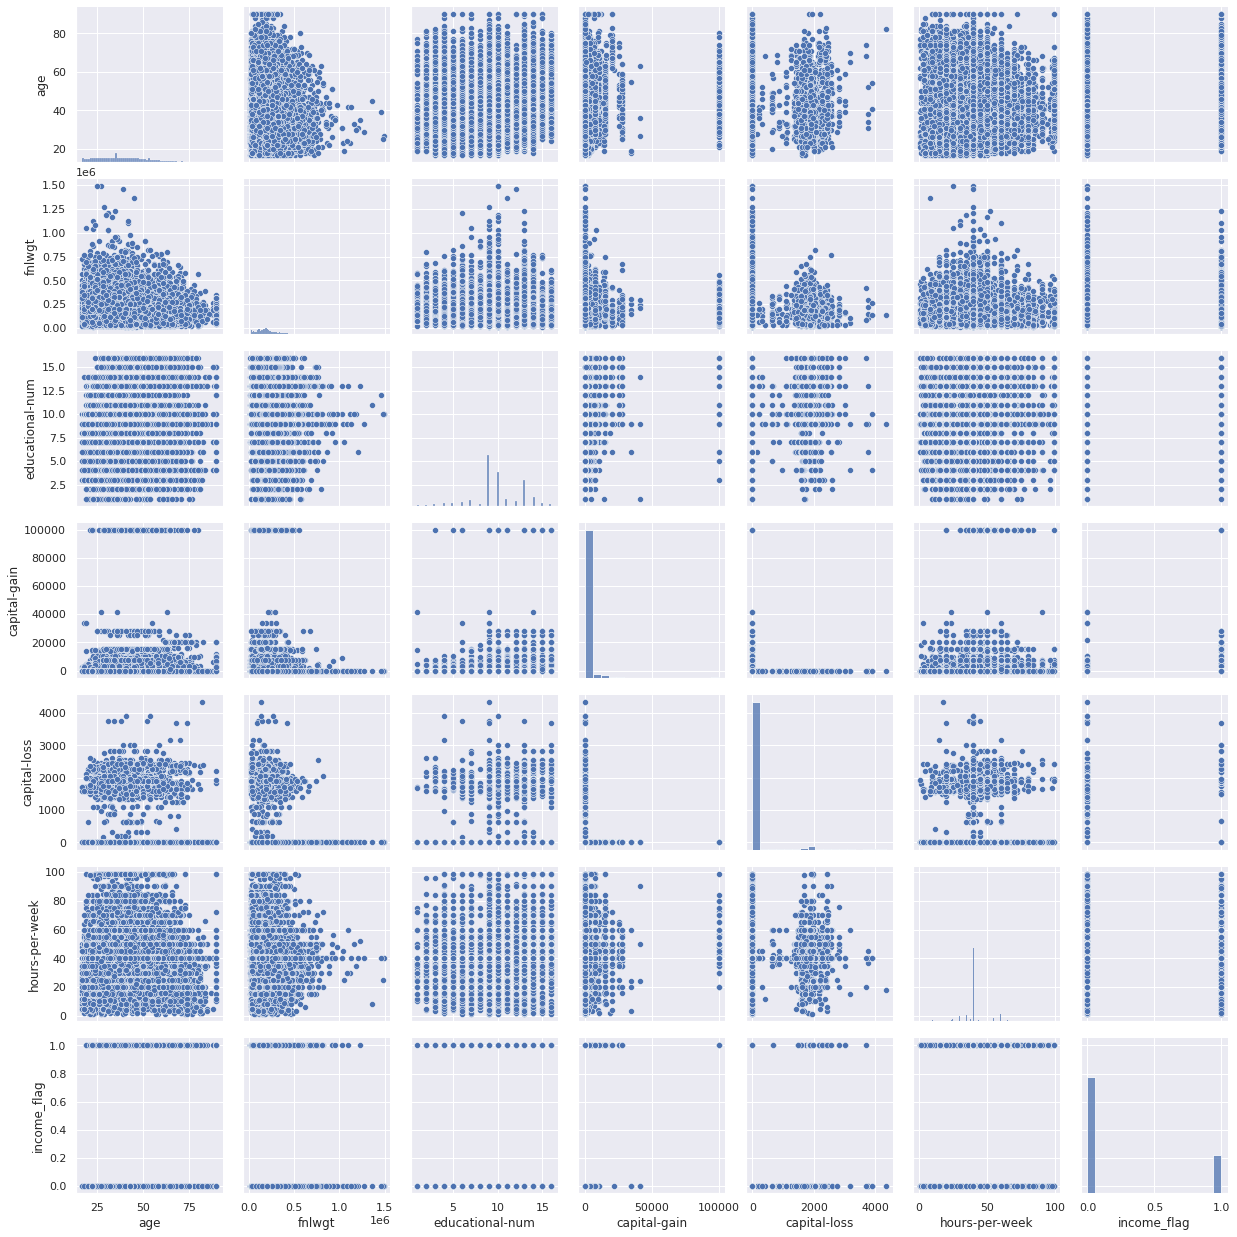

In [ ]:
sns.pairplot(adi_data_v1)

### `age`- `income` relationship

In [ ]:
median_age_le50=adi_data_v1[adi_data_v1['income']=='<=50K']['age'].describe()['50%']
median_age_gt50=adi_data_v1[adi_data_v1['income']=='>50K']['age'].describe()['50%']
print(f'Median age for people:\n- {median_age_le50:.0f} year with income <=50K'
f'\n- {median_age_gt50:.0f} year with income >50K')

Median age for people:
- 34 year with income <=50K
- 43 year with income >50K


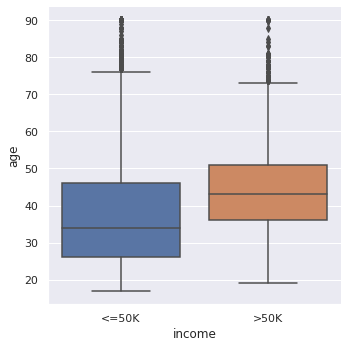

In [ ]:
# Plotting income vs age
sns.catplot(x="income", y= "age", kind="box", data=adi_data_v1)

**Insight:**
* Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(43 year).

### `age` <-> `education` relaion

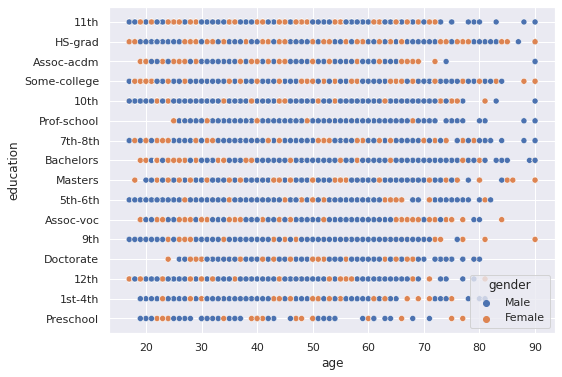

In [ ]:
plt.figure(figsize=(8,6))
chart = sns.scatterplot(x="age",y='education',data=adi_data_v1,hue='gender') 
plt.show(chart) #plotting..

### `workclass` <-> `income` relationship

Text(0.5, 1.0, 'workclass vs count')

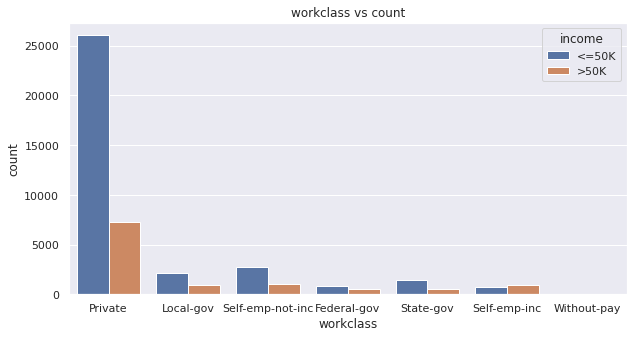

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=adi_data_v1).set_title("workclass vs count")

**Insight:**

* Наибольший доход получают сотрудники `private` класса.
* Во всех `workclasses` количество людей, зарабатывающих менее 50 тысяч, больше, чем тех, кто зарабатывает 50 тысяч.


### `capital-gain` <-> `income` Relationship

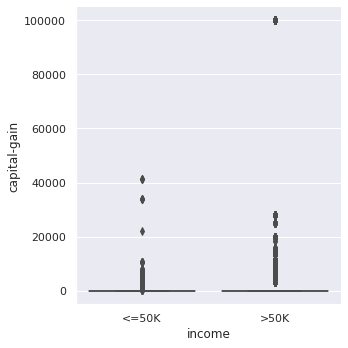

In [ ]:
sns.catplot(x="income", y= "capital-gain", kind="box", data=adi_data_v1)

**Insight:**
* Большая часть стоимости прироста капитала накапливается на уровне 0 для обеих групп дохода.
* Most of the capital gains value is accumulated at 0 for both the income group 

### `capital-loss` <-> `income` relations

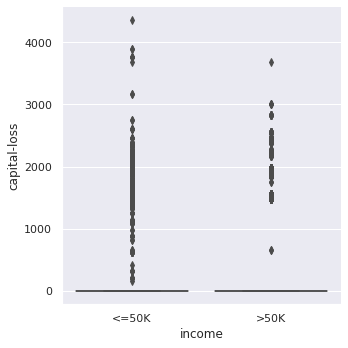

In [ ]:
#plt.figure(figsize=(5,5))
#sns.boxplot(x="income", y="capital-loss", data=adi_data_v1)
#plt.show()

sns.catplot(x="income", y= "capital-loss", kind="box", data=adi_data_v1)

**Insight:**
* This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

### `relationship` <-> `income`

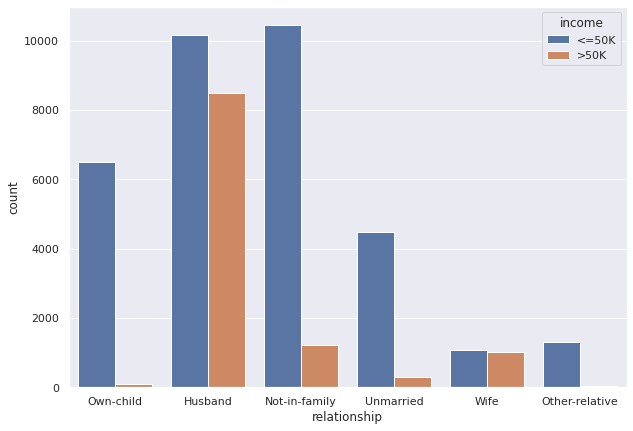

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",
            data=adi_data_v1);

**Insight:**
* Больше всего людей с доходом более 50 тыс. имеют статут женатого человека (со значительным отрывом !)
* Mostly a person with relation as husband in a family has most count of people with more then 50k income

### `race` <-> `income` Relationship

<Figure size 1440x360 with 0 Axes>

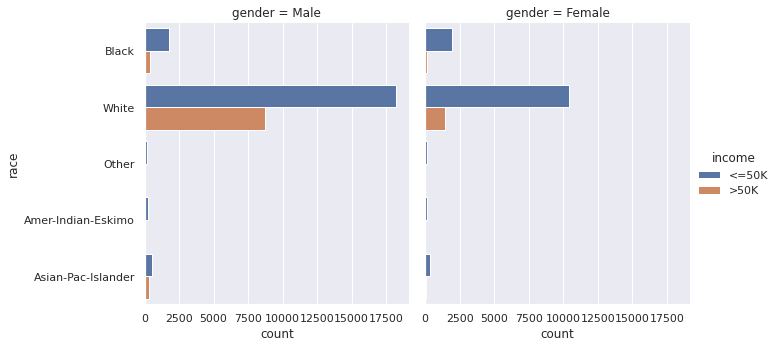

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=adi_data_v1);

**Insight:**
* Совершенно очевидно, что среди людей с доходом более 50 тысяч больше всего людей мужского пола и белой расы.
* It is clear people with Gender male and race as white has the most people with income more then 50k.

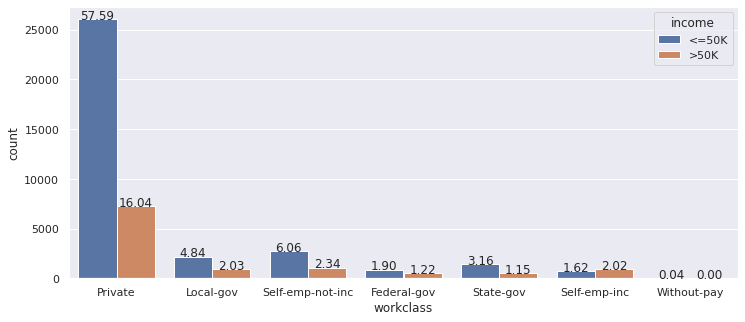

In [ ]:
plt.figure(figsize=(12,5))
total = float(len(adi_data_v1["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=adi_data_v1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

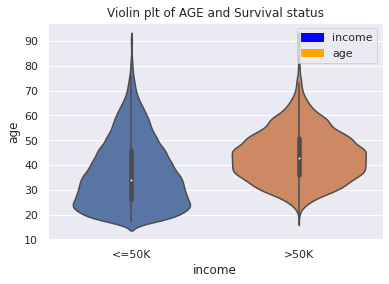

In [ ]:
#violin plot
#---------------------------------------------------------------------------------
sns.violinplot(x="income", y="age", data=adi_data_v1, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='income')
orange_patch = mpatches.Patch(color='orange', label='age')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()

**Insight:**
* by observation of violin plot. This plot gives the combined information of PDF and box plot. The curve denotes the PDF and middle area denotes box plot.

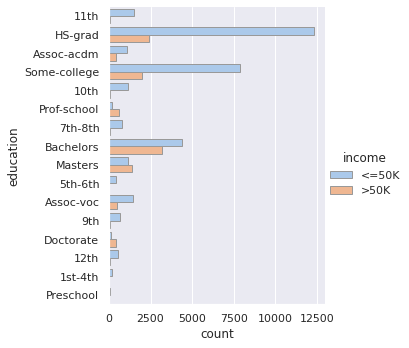

In [ ]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=adi_data_v1);

**Insight:**
* This data mostly consist of people who has education as hs-grad

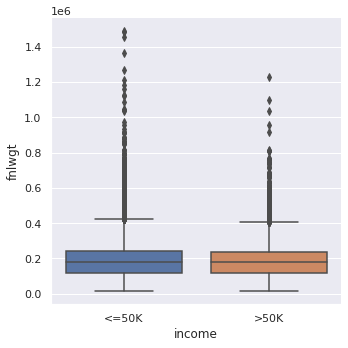

In [ ]:
# Plotting income vs fnlwgt

sns.catplot(x="income", y= "fnlwgt", kind="box", data=adi_data_v1)

**Observations:**

* Несмотря на то, что мы построили график только переменной fnlwgt, переменные capital gain and capital loss имеют схожие характеристики, т.е. они не имеют разницы, выше ли доход 50k или ниже 50k.
* Несмотря на то, что мы нанесли на график только age, переменные educational-num and hours-per-week имеют некоторые вариации в распределении в зависимости от того, превышает ли доход 50 тысяч или меньше 50 тысяч.

**Теперь мы сопоставим категориальные переменные с переменной income, чтобы лучше изучить наши данные.**


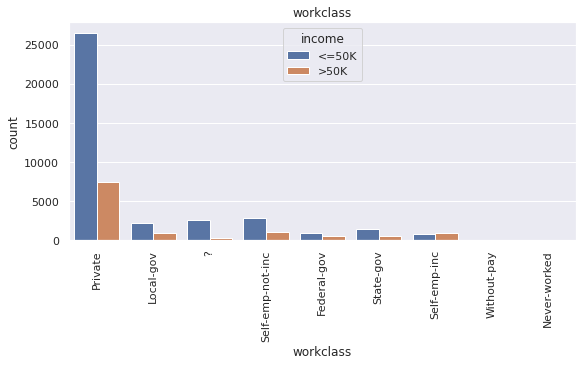

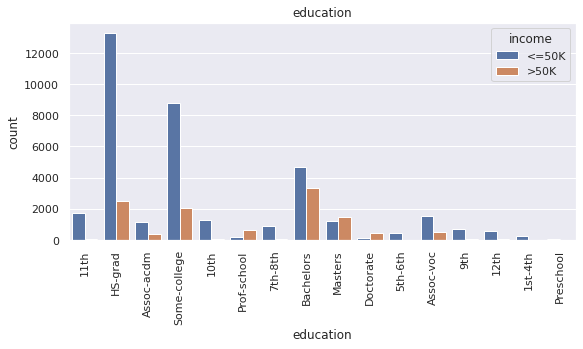

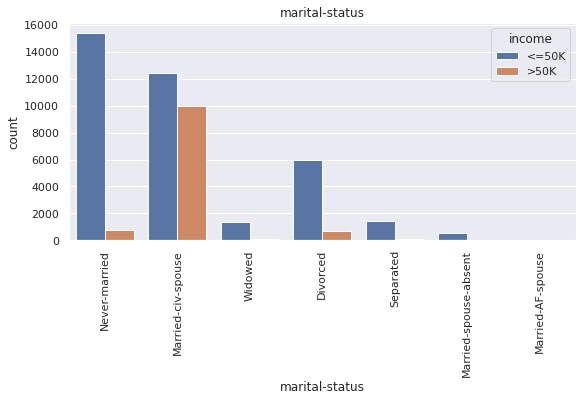

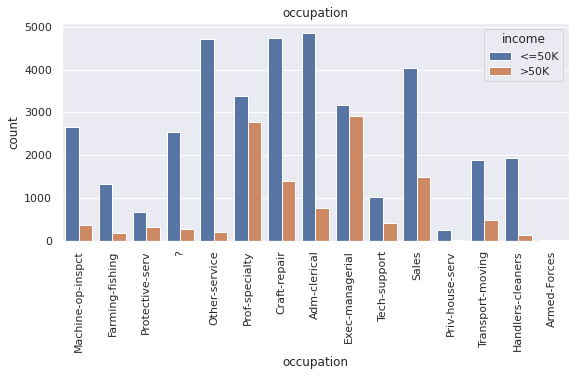

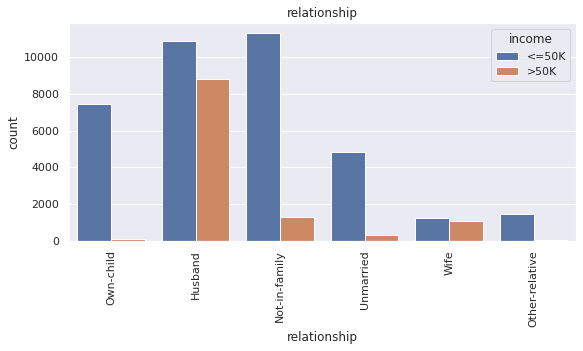

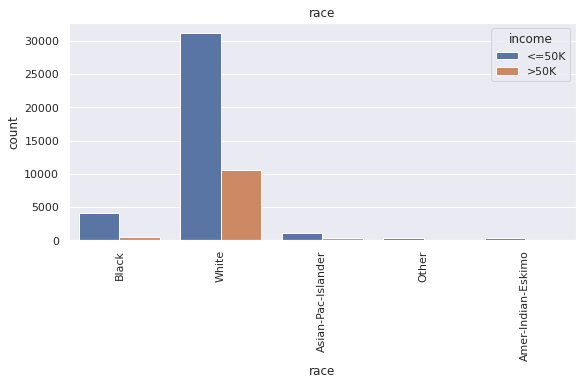

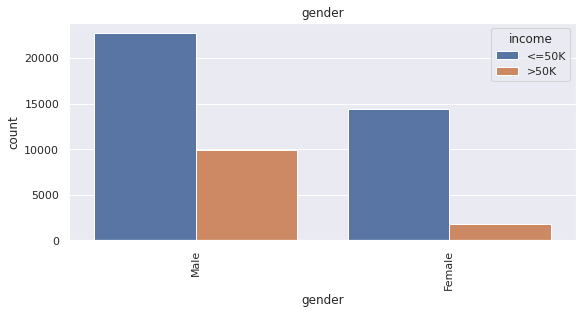

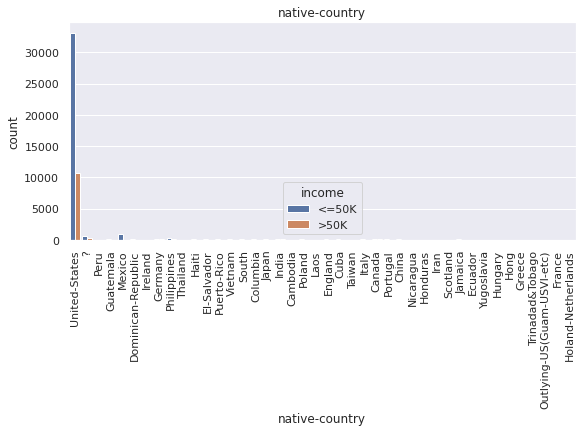

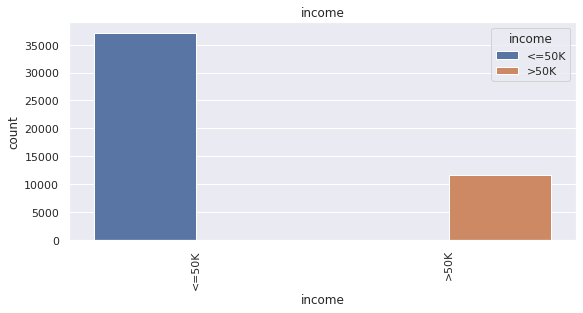

In [ ]:
for column in categorical_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=categorical_data[column],hue=categorical_data['income'],data=categorical_data)
    plt.title(column)    
    plt.xticks(rotation=90)

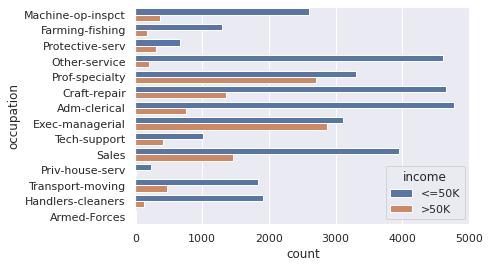

In [ ]:
sns.countplot(y="occupation", hue="income",
            data=adi_data_v1)

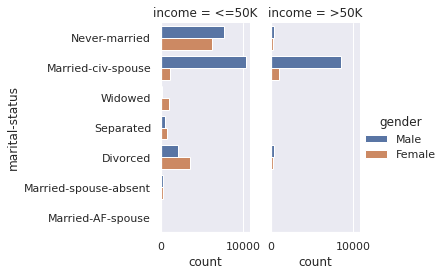

In [ ]:
ct = sns.catplot(y='marital-status',hue='gender',col='income',data=adi_data_v1,kind='count',
                height=4,aspect=.7)

**Insight:**
* The people with marital status as Married-civ-spouce has highest people with income more then 50k.

# Коэф.корреляции Пирсона
Что можно сказать о корреляции между количеством рабочих часов и зарплатой? Является ли она статистически значимой?

[scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

[scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html?highlight=spearmanr#scipy.stats.spearmanr)

[scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html?highlight=kendalltau#scipy.stats.kendalltau)

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [ ]:
def coeffCorrelation(inDF, inVar1, inVar2, verbose=False):
  r_prsn_ = pearsonr(inDF[inVar1], inDF[inVar2])
  r_c_ = spearmanr(inDF[inVar1], inDF[inVar2])
  r_sprm_=(r_c_.correlation,r_c_.pvalue)
  r_c_ = kendalltau(inDF[inVar1], inDF[inVar2])
  r_kndlt_=(r_c_.correlation,r_c_.pvalue)
  if verbose:
    print(f'{"Coeff correlation:":27}{inVar1} <-> {inVar2}')
    print(f'{"Pearson correlation:":27}{r_prsn_[0]:6.4f}, p-value: {r_prsn_[1]}')
    print(f'{"Spearman correlation:":27}{r_sprm_[0]:6.4f}, p-value: {r_sprm_[1]}')
    print(f'{"Kendall’s tau correlation:":27}{r_kndlt_[0]:6.4f}, p-value: {r_kndlt_[1]}')
  return r_prsn_,r_sprm_,r_kndlt_

In [ ]:
r_prsn,r_sprm,r_kndlt = coeffCorrelation(adi_data_v1, 'income_flag', 'hours-per-week') #, verbose=True
print(f'{"Person correlation:":26}{r_prsn[0]:6.4f}, p-value: {r_prsn[1]}')
print(f'{"Spearman correlation:":26}{r_sprm[0]:6.4f}, p-value: {r_sprm[1]}')
print(f'{"Kendall’s tau correlation:":26}{r_kndlt[0]:6.4f}, p-value: {r_kndlt[1]}')

Person correlation:       0.2271, p-value: 0.0
Spearman correlation:     0.2658, p-value: 0.0
Kendall’s tau correlation:0.2357, p-value: 0.0


In [ ]:
r_prsn,r_sprm,r_kndlt = coeffCorrelation(adi_data_v1, 'age',	'fnlwgt')
print(f'{"Person correlation:":26}{r_prsn[0]:6.4f}, p-value: {r_prsn[1]:.3f}')
print(f'{"Spearman correlation:":26}{r_sprm[0]:6.4f}, p-value: {r_sprm[1]:.3f}')
print(f'{"Kendall’s tau correlation:":26}{r_kndlt[0]:6.4f}, p-value: {r_kndlt[1]:.3f}')

Person correlation:       -0.0756, p-value: 0.000
Spearman correlation:     -0.0772, p-value: 0.000
Kendall’s tau correlation:-0.0521, p-value: 0.000


In [ ]:
def dataframeCoeffCorrelation(inDF):
  list_coeff_corr_=[]
  tmp_=inDF.select_dtypes(include=['number','bool'])
  for idx, it in enumerate(tmp_.columns.values):
    for idx1 in range(idx+1, len(tmp_.columns.values)):
      tl_= tmp_.columns.values[idx1]
      #print(f'{it} - {tl_}')
      r_prsn_,r_sprm_,r_kndlt_=coeffCorrelation(tmp_, it,tl_)
      ml_ = [it,tl_,r_prsn_[0],r_prsn_[1],r_sprm_[0],r_sprm_[1],r_kndlt_[0],r_kndlt_[1]]
      list_coeff_corr_.append(ml_)
  list_name = ['var1', 'var2', 
               'PearsonCoeff', 'PearsonPval', 
               'SpearmanCoeff', 'SpearmanPval',
               'KendallCoeff', 'KendallPval']
  df_ = pd.DataFrame (list_coeff_corr_, columns = list_name)
  return df_

In [ ]:
mmm=dataframeCoeffCorrelation(adi_data_v1)
mmm

,var1,var2,PearsonCoeff,PearsonPval,SpearmanCoeff,SpearmanPval,KendallCoeff,KendallPval
0,age,fnlwgt,-0.075590,3.053246e-58,-0.077208,1.090040e-60,-0.052148,8.809375e-61
1,age,educational-num,0.037269,2.302847e-15,0.066943,4.896218e-46,0.053117,7.239795e-54
2,age,capital-gain,0.079649,1.753327e-64,0.121043,5.131888e-147,0.097995,3.492655e-146
3,age,capital-loss,0.059258,1.965301e-36,0.060521,6.245386e-38,0.049449,5.976784e-38
4,age,hours-per-week,0.101604,5.989794e-104,0.157101,1.748430e-247,0.118165,4.982117e-258
5,age,income_flag,0.236839,0.000000e+00,0.271901,0.000000e+00,0.224407,0.000000e+00
6,age,income+,0.236839,0.000000e+00,0.271901,0.000000e+00,0.224407,0.000000e+00
7,fnlwgt,educational-num,-0.041992,4.303311e-19,-0.032005,1.017935e-11,-0.023088,1.127189e-11
8,fnlwgt,capital-gain,-0.004118,3.814687e-01,-0.009985,3.382362e-02,-0.007981,3.404532e-02
9,fnlwgt,capital-loss,-0.004359,3.542055e-01,-0.002106,6.544545e-01,-0.001708,6.529303e-01


In [ ]:
def listCoeffCorrelation(inDF):
  list_coeff_corr_=[]
  tmp_=inDF.select_dtypes(include=['number','bool'])
  for idx, it in enumerate(tmp_.columns.values):
    for idx1 in range(idx+1, len(tmp_.columns.values)):
      tl_= tmp_.columns.values[idx1]
      #print(f'{it} - {tl_}')
      r_prsn_,r_sprm_,r_kndlt_=coeffCorrelation(tmp_, it,tl_)
      ml_ = [it,tl_,r_prsn_,r_sprm_,r_kndlt_]
      list_coeff_corr_.append(ml_)
  return list_coeff_corr_


In [ ]:
l_cc = listCoeffCorrelation(adi_data_v1)
for itm in l_cc:
  print(f'{itm[0]}-{itm[1]}: Pearson({itm[2]}), Spearman({itm[3]}), Kendall’s tau({itm[4]})')
  #print(f'{itm[0]}')


age-fnlwgt: Pearson((-0.07559042876425065, 3.0532461446130025e-58)), Spearman((-0.07720766873661891, 1.0900403248340625e-60)), Kendall’s tau((-0.05214801739061696, 8.809374814634523e-61))
age-educational-num: Pearson((0.037269003138111614, 2.302846806565347e-15)), Spearman((0.06694258983462066, 4.89621781976946e-46)), Kendall’s tau((0.053116873747498676, 7.239794869095563e-54))
age-capital-gain: Pearson((0.07964936646529677, 1.753327367110564e-64)), Spearman((0.12104255368836363, 5.131888332738955e-147)), Kendall’s tau((0.09799494321503323, 3.492654653532247e-146))
age-capital-loss: Pearson((0.059257943794739566, 1.965301098121559e-36)), Spearman((0.060520557005299215, 6.245386204710003e-38)), Kendall’s tau((0.04944856718735789, 5.976784157587226e-38))
age-hours-per-week: Pearson((0.10160350021771641, 5.989794103040158e-104)), Spearman((0.1571008924728439, 1.7484296396179713e-247)), Kendall’s tau((0.11816453552836077, 4.98211656843635e-258))
age-income_flag: Pearson((0.2368385779538022

In [ ]:
l_cc

[['age',
  'fnlwgt',
  (-0.07559042876425065, 3.0532461446130025e-58),
  (-0.07720766873661891, 1.0900403248340625e-60),
  (-0.05214801739061696, 8.809374814634523e-61)],
 ['age',
  'educational-num',
  (0.037269003138111614, 2.302846806565347e-15),
  (0.06694258983462066, 4.89621781976946e-46),
  (0.053116873747498676, 7.239794869095563e-54)],
 ['age',
  'capital-gain',
  (0.07964936646529677, 1.753327367110564e-64),
  (0.12104255368836363, 5.131888332738955e-147),
  (0.09799494321503323, 3.492654653532247e-146)],
 ['age',
  'capital-loss',
  (0.059257943794739566, 1.965301098121559e-36),
  (0.060520557005299215, 6.245386204710003e-38),
  (0.04944856718735789, 5.976784157587226e-38)],
 ['age',
  'hours-per-week',
  (0.10160350021771641, 5.989794103040158e-104),
  (0.1571008924728439, 1.7484296396179713e-247),
  (0.11816453552836077, 4.98211656843635e-258)],
 ['age',
  'income_flag',
  (0.23683857795380225, 0.0),
  (0.27190100744892837, 0.0),
  (0.22440665479102032, 0.0)],
 ['age',
  '

In [ ]:
l_cc

[['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
  (0.22714641313864786, 0.0),
  (0.26576119457689396, 0.0),
  (0.23568678684251712, 0.0)],
 ['hhh',
  'ttt',
 

**Insight:**
* Поскольку p-value < 0.05, делаем вывод о том, что корреляция является статистически значимой.

In [ ]:
adi_data_v1.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_flag,income+
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,True


**Observations:**

**Люди с доходом более 50 тысяч:**
* Из workclass, которые privately employed, а также self employed individuals.
* Если рассматривать качество информации, то магистров и бакалавров, а также выпускников средних школ и колледжей.
* По семейному положению - marital status, люди, состоящие в браке (married) и имеющие супруга (have a spouse).
* Лица, занимающие руководящие должности (exec-managerial) или имеющие профессиональную специальность (professional speciality).
* Лица, являющиеся мужьями.
* Белые люди.
* Особи мужского пола.
* Люди, живущие в США.


**Observations from EDA:**
* Некоторые переменные являются высокопрогнозными при классификации того, имеет ли человек доход более 50 тыс. А некоторые переменные менее предиктивные.
* Мы оставим переменные fnlwgt, capital-gain, and capital-loss на основе нашего EDA.
* В основном мы избавимся от переменных с наименьшим потенциалом предсказаний, которые показывают очень малую изменчивость (variance) при создании наших моделей.



**Outlier Treatment:**
Обработка выбросов:
* Мы тщательно проанализировали наши данные и, основываясь на наших наблюдениях, при необходимости будем обрабатывать наши выбросы, учитывая методологию обработки экстремальных выбросов.
* Мы заменим выбросы на `firstquartile-3*IQR` и `thirdquartile+3*IQR`.
* Есть много других методов, с помощью которых мы можем обрабатывать наши выбросы.

На начальных этапах мы проанализировали числовые данные с помощью функции описания. Если мы посмотрим на переменную 'age', она колеблется от 17 до 90, что является идеальным возрастом, который может быть у нормального человека. Кроме того, существует переменная 'educational-num', которая, если внимательно присмотреться, является кодировкой категориальной переменной `education`. Следовательно, мы не будем рассматривать какие-либо выбросы для этих переменных. Кроме того, мы не будем использовать переменные 'fnlwgt', 'capital-loss' and 'capital-gain', поскольку они не показывают достаточной дисперсии. 


Мы подробно рассмотрим переменную 'hours-per-week', чтобы оценить, нужна ли нам обработка выбросов

In [ ]:
# Exploring the hours-per-week variable more.

adi_data_v1['hours-per-week'].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

**Obsevations:**
* Если мы проверим hours per week, обычно 90 часов в неделю разумно, но есть много случаев, когда люди работали более 90 часов.
* Мы изучим данные более детально для случаев, когда work hours-per-week превышает 90, и решим, нужно ли нам обрабатывать выбросы.


In [ ]:
workhours = adi_data_v1[adi_data_v1['hours-per-week']>= 90]
workhours

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,45,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
723,35,Self-emp-not-inc,28987,9th,5,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,96,United-States,<=50K
810,46,Private,199378,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,90,United-States,<=50K
901,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47444,29,Self-emp-not-inc,404998,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,90,United-States,<=50K
47932,28,State-gov,297735,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,90,United-States,<=50K
47962,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K


**Observations:**
* Большинство людей, которые работают сверхурочно (work long hours), имеют образование ниже бакалавра (below Bachelor's).
* 65% этих людей имеют доход ниже 50к.
* Таким образом, количество часов работы (work hours) выше 90, мы сохраним их как есть, не считая их выбросами


## MULTIVARIATE analysis

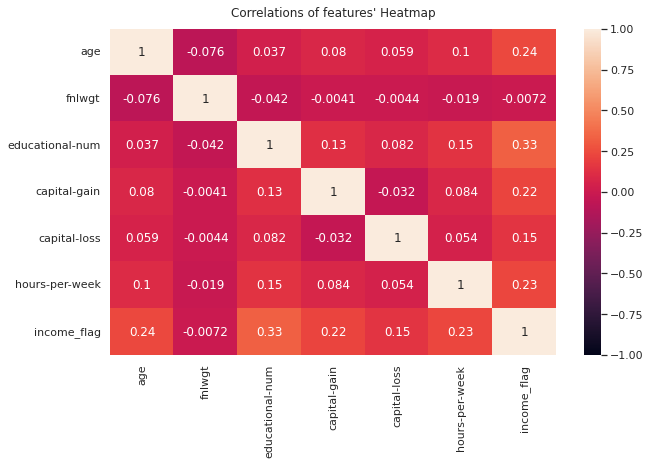

In [ ]:
correlation = adi_data_v1.corr() # calculate correlation 
plt.figure(figsize=(10,6)) # plot size 
heatmap = sns.heatmap(correlation,vmin=-1,vmax=1,annot=True) 
heatmap.set_title("Correlations of features' Heatmap" , fontdict={'fontsize':12}, pad=12); 

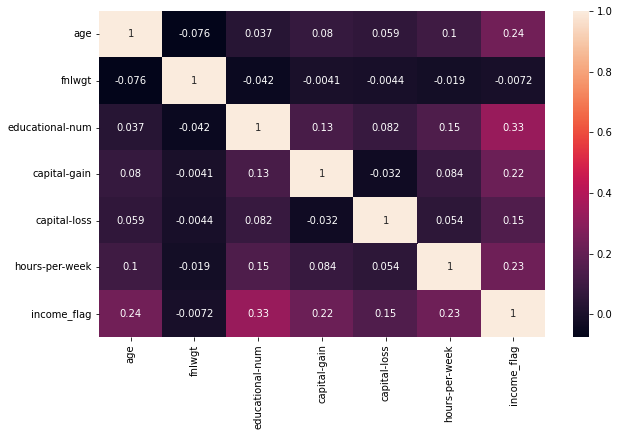

In [ ]:
# https://indianaiproduction.com/seaborn-heatmap/

plt.subplots(figsize=(10,6))
sns.heatmap(adi_data_v1.corr(), annot = True)

<Figure size 720x360 with 0 Axes>

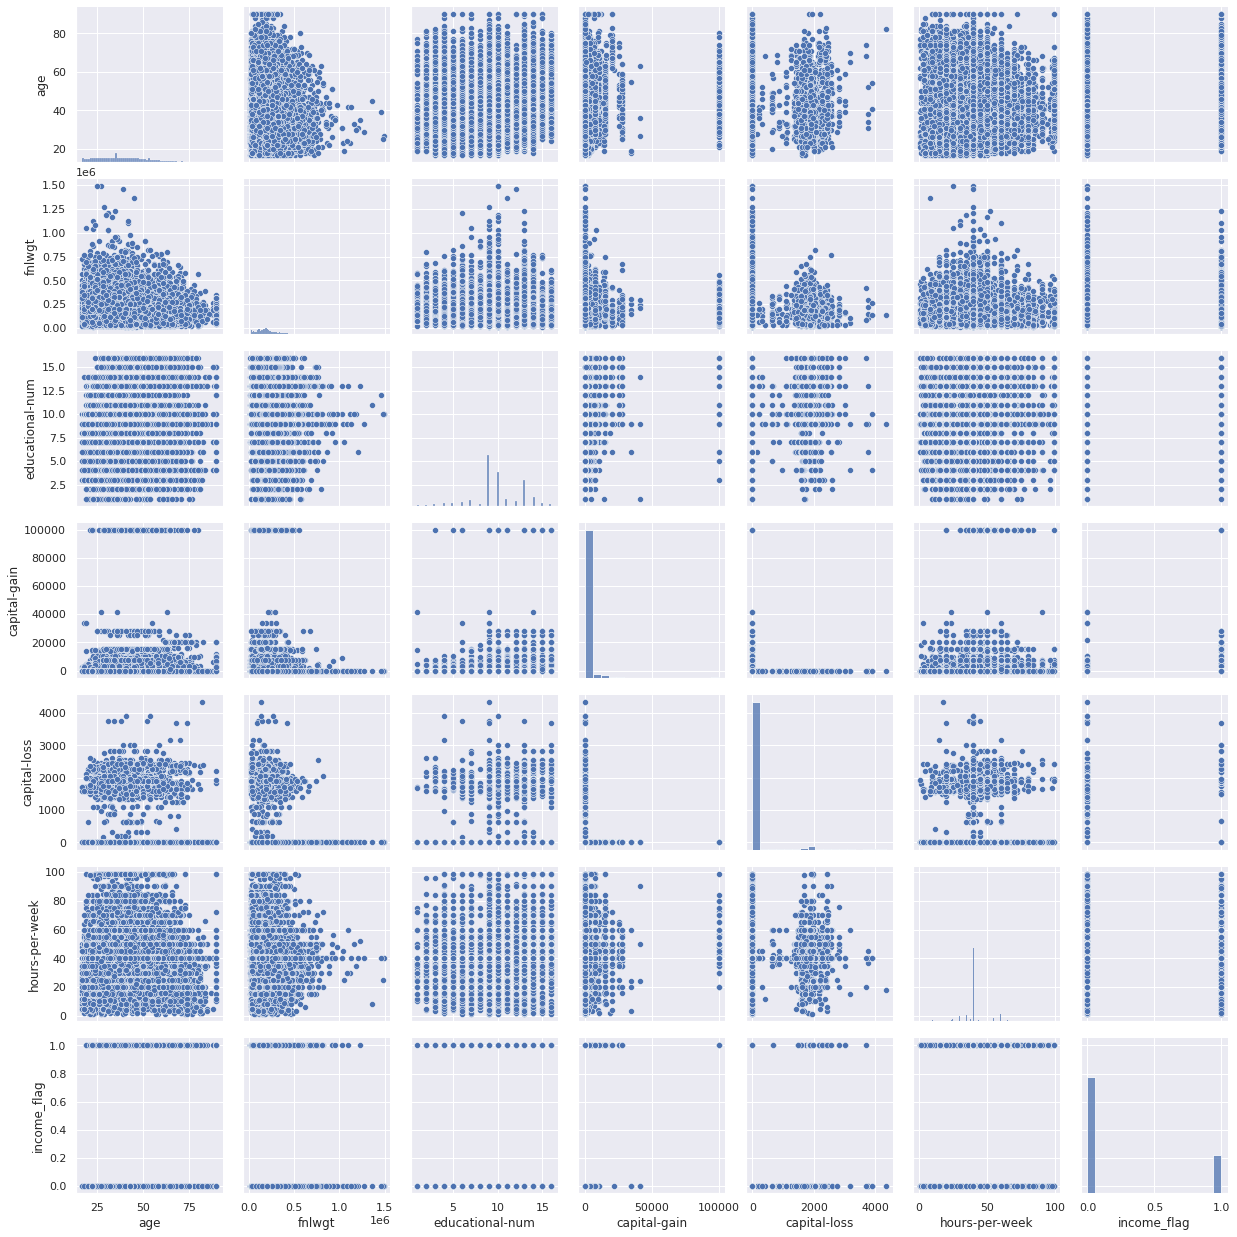

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(adi_data_v1)

## IDEAL CASE BASED ON EXTENSIVE EDA:
Идеальным случаем для человека с доходом **выше 50k будет**:

* Возраст около 45 лет.
* Работает около 45 часов в неделю.
* Имеет степень магистра или бакалавра.
* Женат.
* Белый.
* Гражданин США.
* Имеет профессию исполнительного менеджера (exec-managerial) или имеет профессиональную специальность.
* Мужчина.

Это все относительно EDA, надеюсь, вам, ребята, понравилось это путешествие по изучению данных и более глубокому пониманию, мне наверняка было очень весело. Следите за новостями о предстоящих частях (разработка функций, выбор, моделирование и настройка гиперпараметров).


## Change workclass datatype to categorical

In [ ]:
typed_df=adi_data_v1.copy(deep=True)

In [ ]:
pd.get_dummies(typed_df['workclass']).sum()

Federal-gov          1406
Local-gov            3100
Private             33262
Self-emp-inc         1645
Self-emp-not-inc     3795
State-gov            1946
Without-pay            21
dtype: int64

In [ ]:
typed_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
 15  income_flag      45175 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 43.8 MB


In [ ]:
typed_df['workclass'] = typed_df['workclass'].astype('category')

In [ ]:
typed_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45175 non-null  int64   
 1   workclass        45175 non-null  category
 2   fnlwgt           45175 non-null  int64   
 3   education        45175 non-null  object  
 4   educational-num  45175 non-null  int64   
 5   marital-status   45175 non-null  object  
 6   occupation       45175 non-null  object  
 7   relationship     45175 non-null  object  
 8   race             45175 non-null  object  
 9   gender           45175 non-null  object  
 10  capital-gain     45175 non-null  int64   
 11  capital-loss     45175 non-null  int64   
 12  hours-per-week   45175 non-null  int64   
 13  native-country   45175 non-null  object  
 14  income           45175 non-null  object  
 15  income_flag      45175 non-null  int64   
dtypes: category(1), int64(7), object(8)
memo